This notebook assumes you are using sims_maf version >= 1.1, and have 'setup sims_maf' in your shell. 

This notebook shows how MAF can use the LSST camera geometry to decide if a region has been observed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
from lsst.sims.maf.plots import PlotHandler

In [2]:
# Set the database and query
database = 'enigma_1189_sqlite.db'
sqlWhere = 'filter = "r" and night < 400 and fieldRA < %f and fieldDec > %f and fieldDec < 0' % (np.radians(15), np.radians(-15))
opsdb = db.OpsimDatabase(database)
outDir = 'Camera'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
nside=512
metric = metrics.CountMetric('expMJD')
slicer = slicers.HealpixSlicer(nside=nside)
slicer2 = slicers.HealpixSlicer(nside=nside, useCamera=True, radius=1.9)
summaryMetrics = [metrics.SumMetric()]

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes


In [4]:
bundle1 = metricBundles.MetricBundle(metric,slicer,sqlWhere, summaryMetrics=summaryMetrics)
bundle2 = metricBundles.MetricBundle(metric,slicer2,sqlWhere, summaryMetrics=summaryMetrics)
bg = metricBundles.MetricBundleGroup({'NoCamera':bundle1, 'WithCamera':bundle2},opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Querying database with constraint filter = "r" and night < 400 and fieldRA < 0.261799 and fieldDec > -0.261799 and fieldDec < 0
Found 270 visits
Running:  ['NoCamera']
Completed metric generation.
Running:  ['WithCamera']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Config override file '/Users/yoachim/lsst/DarwinX86/obs_lsstSim/w.2015.33/description/camera/camera.py' appears to use 'root' instead of 'config'; trying with 'root'

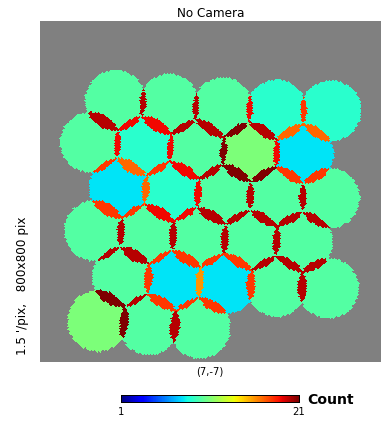

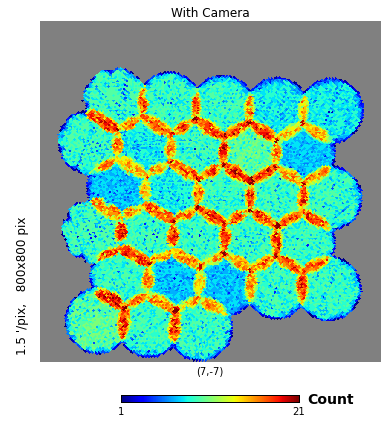

In [5]:
import healpy as hp
hp.gnomview(bundle1.metricValues, xsize=800,ysize=800, rot=(7,-7,0), title='No Camera', unit='Count', min=1,max=21)
hp.gnomview(bundle2.metricValues, xsize=800,ysize=800, rot=(7,-7,0),title='With Camera', unit='Count', min=1,max=21)

In [6]:
# Print the number of pixel observations in the 2 cases. Note that running without the camera is about 3-4% optimistic.
print bundle1.summaryValues
print bundle2.summaryValues

{'Sum': 198053.0}
{'Sum': 190987.0}


Now to try it again with dithering turned on

In [7]:
sqlWhere = 'filter = "r" and night < 400 and ditheredRA < %f and ditheredDec > %f and ditheredDec < 0' % (np.radians(15), np.radians(-15))
slicer = slicers.HealpixSlicer(latCol='ditheredDec', lonCol='ditheredRA', nside=nside)
slicer2 = slicers.HealpixSlicer(latCol='ditheredDec', lonCol='ditheredRA',nside=nside, useCamera=True, radius=1.9)
bundle1 = metricBundles.MetricBundle(metric,slicer,sqlWhere, summaryMetrics=summaryMetrics)
bundle2 = metricBundles.MetricBundle(metric,slicer2,sqlWhere, summaryMetrics=summaryMetrics)
bg = metricBundles.MetricBundleGroup({'NoCamera':bundle1, 'WithCamera':bundle2},opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Querying database with constraint filter = "r" and night < 400 and ditheredRA < 0.261799 and ditheredDec > -0.261799 and ditheredDec < 0
Found 253 visits
Running:  ['NoCamera']
Completed metric generation.
Running:  ['WithCamera']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Config override file '/Users/yoachim/lsst/DarwinX86/obs_lsstSim/w.2015.33/description/camera/camera.py' appears to use 'root' instead of 'config'; trying with 'root'

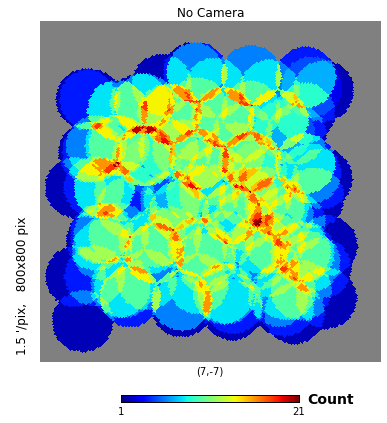

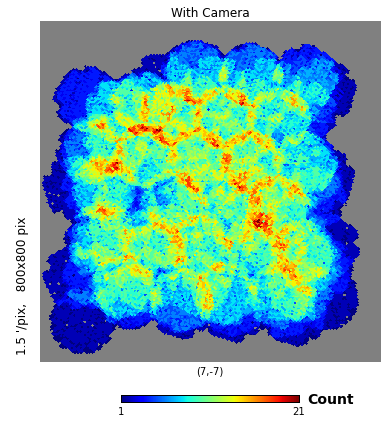

In [8]:

hp.gnomview(bundle1.metricValues, xsize=800,ysize=800, rot=(7,-7,0), title='No Camera', unit='Count', min=1,max=21)
hp.gnomview(bundle2.metricValues, xsize=800,ysize=800, rot=(7,-7,0),title='With Camera', unit='Count', min=1,max=21)

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Querying database with constraint filter = "r" and ditheredRA < 0.261799 and ditheredDec > -0.261799 and ditheredDec < 0
Found 5681 visits
Running:  ['NoCamera']
Completed metric generation.
Running:  ['WithCamera']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Config override file '/Users/yoachim/lsst/DarwinX86/obs_lsstSim/w.2015.33/description/camera/camera.py' appears to use 'root' instead of 'config'; trying with 'root'

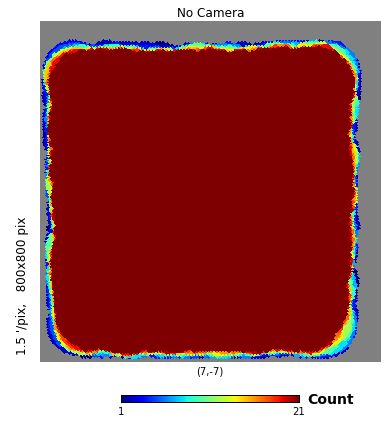

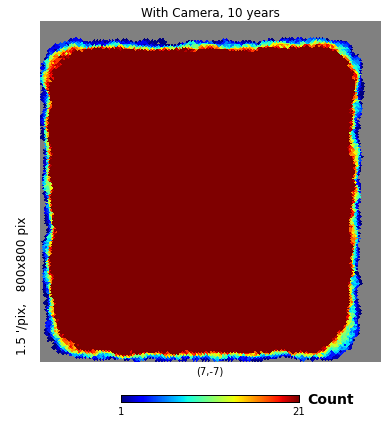

In [9]:
sqlWhere = 'filter = "r" and ditheredRA < %f and ditheredDec > %f and ditheredDec < 0' % (np.radians(15), np.radians(-15))
slicer = slicers.HealpixSlicer(latCol='ditheredDec', lonCol='ditheredRA', nside=nside)
slicer2 = slicers.HealpixSlicer(latCol='ditheredDec', lonCol='ditheredRA',nside=nside, useCamera=True, radius=1.9)
bundle1 = metricBundles.MetricBundle(metric,slicer,sqlWhere, summaryMetrics=summaryMetrics)
bundle2 = metricBundles.MetricBundle(metric,slicer2,sqlWhere, summaryMetrics=summaryMetrics)
bg = metricBundles.MetricBundleGroup({'NoCamera':bundle1, 'WithCamera':bundle2},opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()


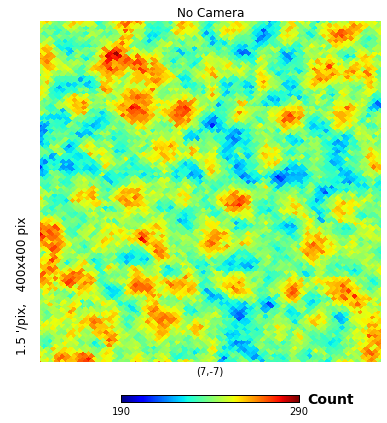

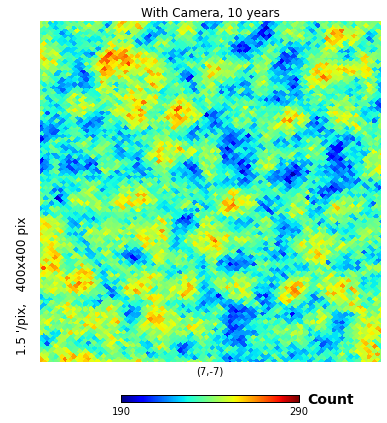

In [14]:
hp.gnomview(bundle1.metricValues, xsize=400,ysize=400, rot=(7,-7,0), title='No Camera', unit='Count', min=190, max=290)
hp.gnomview(bundle2.metricValues, xsize=400,ysize=400, rot=(7,-7,0),title='With Camera, 10 years', unit='Count', min=190, max=290)

In [8]:
sqlWhere = 'fieldID = 2266 and night < 500'
nside = 2048
metric = metrics.CountMetric('expMJD')
slicer = slicers.HealpixSlicer(nside=nside, useCamera=True, radius=1.9)
bundle1 = metricBundles.MetricBundle(metric,slicer,sqlWhere)

bg = metricBundles.MetricBundleGroup({'HighResCamera':bundle1},opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Healpix slicer using NSIDE=2048, approximate resolution 1.717743 arcminutes
Querying database with constraint fieldID = 2266 and night < 500
Found 79 visits
Running:  ['HighResCamera']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/lsst/DarwinX86/anaconda/master-g68783b1848/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression 'fieldID = 2266 and night ...' should be explicitly declared as text('fieldID = 2266 and night ...') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})


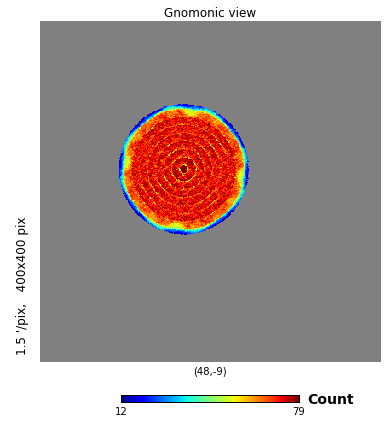

In [9]:
hp.gnomview(bundle1.metricValues, xsize=400,ysize=400, rot=(48,-9,0), unit='Count')